## SARIMAX Model on time series

The basic data exploration and analysis has been carried out while creating Holt Winter's model. Therefore, I will skip that part here.

### Import packages

In [11]:
import pandas as pd          
import numpy as np          
import matplotlib.pyplot as plt  
from datetime import datetime    
from pandas import Series        
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")
import math
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

### Load dataset

In [3]:
# Import dataset and make a copy
train=pd.read_csv("Train_SU63ISt.csv")
test=pd.read_csv("Test_0qrQsBZ.csv")

train_original=train.copy()
test_original=test.copy()

### Change datetime format

In [4]:
train['Datetime'] = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
test['Datetime'] = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test_original['Datetime'] = pd.to_datetime(test_original.Datetime,format='%d-%m-%Y %H:%M')
train_original['Datetime'] = pd.to_datetime(train_original.Datetime,format='%d-%m-%Y %H:%M')

In [5]:
# dropping ID as it's not required
train=train.drop('ID',1)

### Resample with daily mean

In [6]:
# We will work with daily means for modeling
test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test.index = test.Timestamp 

# Converting to daily mean
test = test.resample('D').mean()

train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp

# Converting to daily mean
train = train.resample('D').mean()

/Users/aditiprabhakar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
/Users/aditiprabhakar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


### Splitting data into train and validation set on basis of timstamp

In [7]:
Train=train.ix['2012-08-25':'2014-06-24']
valid=train.ix['2014-06-25':'2014-09-25']

### Model 

/Users/aditiprabhakar/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


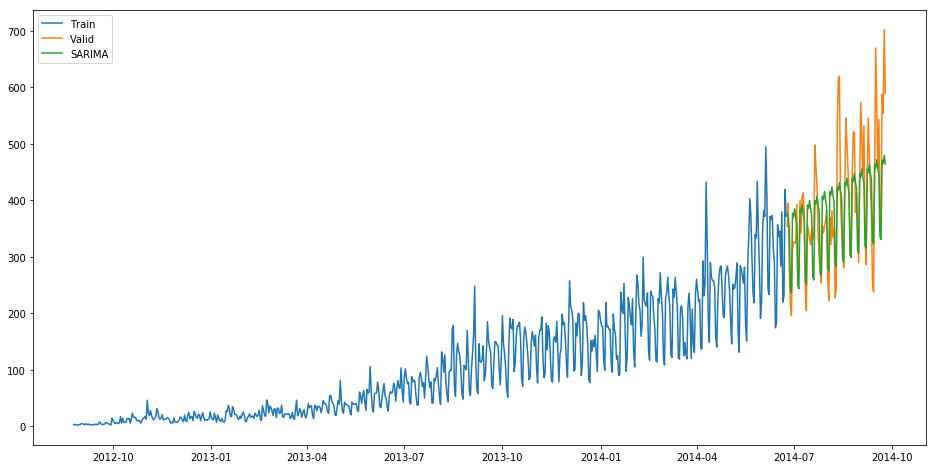

In [8]:
y_hat_avg = valid.copy()
fit1 = sm.tsa.statespace.SARIMAX(Train.Count, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start="2014-6-25", end="2014-9-25", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot( Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

In [12]:
rms = math.sqrt(mean_squared_error(valid.Count, y_hat_avg.SARIMA))
print(rms)

70.07771346693407


### Predict

In [13]:
predict=fit1.predict(start="2014-9-26", end="2015-4-26", dynamic=True)

In [14]:
test['prediction']=predict

This is daily prediction. We can convert this into hourly by using the code from Holt Winter's model.